In [1]:
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats.mstats import winsorize

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

import sklearn
from sklearn.metrics import r2_score, mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge


In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/dheephiga/usa-dataset/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/dheephiga/usa-dataset/main/test.csv")

In [4]:
train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [5]:
df_train = train.copy()
df_test = test.copy()

In [6]:
df_train.shape,df_test.shape

((39499, 15), (10500, 14))

In [7]:
df_train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [8]:
df_train.isnull().sum(),df_test.isnull().sum()

(Property_ID                  0
 Property_Type                0
 Property_Area                0
 Number_of_Windows         1654
 Number_of_Doors              0
 Furnishing                1042
 Frequency_of_Powercuts    1383
 Power_Backup                 0
 Water_Supply                 0
 Traffic_Density_Score        0
 Crime_Rate                 787
 Dust_and_Noise            1219
 Air_Quality_Index            0
 Neighborhood_Review          0
 Habitability_score           0
 dtype: int64,
 Property_ID                 0
 Property_Type               0
 Property_Area               0
 Number_of_Windows         445
 Number_of_Doors             0
 Furnishing                257
 Frequency_of_Powercuts    366
 Power_Backup                0
 Water_Supply                0
 Traffic_Density_Score       0
 Crime_Rate                212
 Dust_and_Noise            330
 Air_Quality_Index           0
 Neighborhood_Review         0
 dtype: int64)

In [9]:
df_train.set_index('Property_ID', inplace=True)
df_test.set_index('Property_ID', inplace=True)

In [10]:
df_train.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_ID,,,,,,,,,,,,,,
0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39499 entries, 0x21e3 to 0x8cb4
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           39499 non-null  object 
 1   Property_Area           39499 non-null  int64  
 2   Number_of_Windows       37845 non-null  float64
 3   Number_of_Doors         39499 non-null  int64  
 4   Furnishing              38457 non-null  object 
 5   Frequency_of_Powercuts  38116 non-null  float64
 6   Power_Backup            39499 non-null  object 
 7   Water_Supply            39499 non-null  object 
 8   Traffic_Density_Score   39499 non-null  float64
 9   Crime_Rate              38712 non-null  object 
 10  Dust_and_Noise          38280 non-null  object 
 11  Air_Quality_Index       39499 non-null  float64
 12  Neighborhood_Review     39499 non-null  float64
 13  Habitability_score      39499 non-null  float64
dtypes: float64(6), int64(2), object(6)
me

In [12]:
df_train['Number_of_Windows'].fillna(df_train['Number_of_Windows'].median(), inplace = True)
df_train['Frequency_of_Powercuts'].fillna(df_train['Frequency_of_Powercuts'].median(), inplace = True)
df_train['Furnishing'].fillna(df_train['Furnishing'].mode()[0], inplace = True)
df_train['Crime_Rate'].fillna(df_train['Crime_Rate'].mode()[0], inplace = True)
df_train['Dust_and_Noise'].fillna(df_train['Dust_and_Noise'].mode()[0], inplace = True)

df_test['Number_of_Windows'].fillna(df_test['Number_of_Windows'].median(), inplace = True)
df_test['Frequency_of_Powercuts'].fillna(df_test['Frequency_of_Powercuts'].median(), inplace = True)
df_test['Furnishing'].fillna(df_test['Furnishing'].mode()[0], inplace = True)
df_test['Crime_Rate'].fillna(df_test['Crime_Rate'].mode()[0], inplace = True)
df_test['Dust_and_Noise'].fillna(df_test['Dust_and_Noise'].mode()[0], inplace = True)

In [13]:
cdf_train = df_train.loc[:,df_train.dtypes==np.object]
ndf_train = df_train.loc[:,df_train.dtypes!=np.object]
cdf_test = df_test.loc[:,df_test.dtypes==np.object]
ndf_test = df_test.loc[:,df_test.dtypes!=np.object]

C:\Users\Anitha\AppData\Local\Temp\ipykernel_2452\2208888697.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cdf_train = df_train.loc[:,df_train.dtypes==np.object]
C:\Users\Anitha\AppData\Local\Temp\ipykernel_2452\2208888697.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ndf_train = df_train.loc[:,df_train.dtypes!=np.object]
C:\Users\Anitha\AppData\Local\Temp\ipykernel_2452\2208888697.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `obje

In [14]:
ndf_train

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_ID,,,,,,,,
0x21e3,106,4.0,1,0.0,5.89,90.0,3.86,71.98
0x68d4,733,2.0,2,1.0,4.37,96.0,3.55,71.20
0x7d81,737,4.0,2,0.0,7.45,121.0,3.81,71.39
0x7a57,900,3.0,2,2.0,6.16,100.0,1.34,31.46
0x9409,2238,14.0,6,0.0,5.46,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...
0x6e26,1120,3.0,2,0.0,5.55,80.0,3.56,73.43
0xa013,445,1.0,3,1.0,5.70,86.0,2.93,79.91
0x9721,3780,6.0,6,0.0,6.84,137.0,3.80,81.44


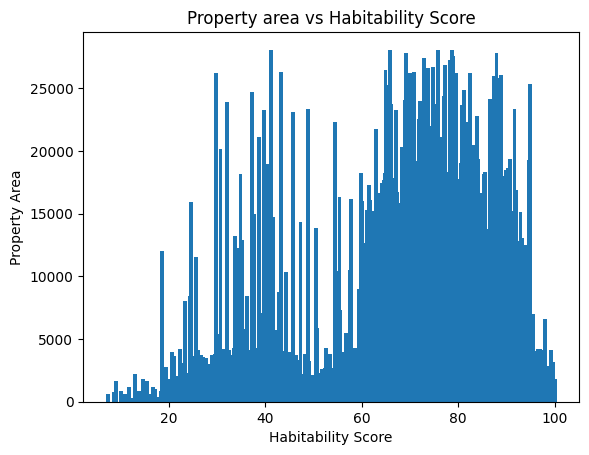

In [15]:
plt.title("Property area vs Habitability Score")
plt.bar(df_train.Habitability_score,df_train.Property_Area)
plt.xlabel("Habitability Score")
plt.ylabel("Property Area")
plt.show()

Property area is proportional with habitability score

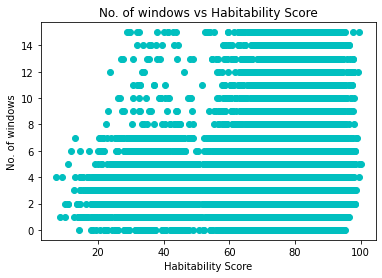

In [16]:
plt.title("No. of windows vs Habitability Score")
plt.scatter(df_train.Habitability_score,df_train.Number_of_Windows, c='c')
plt.xlabel("Habitability Score")
plt.ylabel("No. of windows")
plt.show()

People don't prefer houses with more than 8 windows

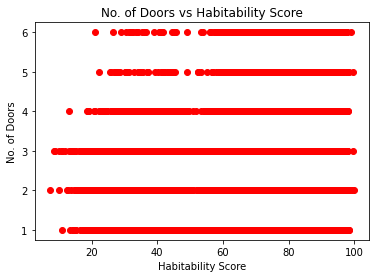

In [17]:
plt.title("No. of Doors vs Habitability Score")
plt.scatter(df_train.Habitability_score,df_train.Number_of_Doors,c="red")
plt.xlabel("Habitability Score")
plt.ylabel("No. of Doors")
plt.show()

Poeple prefer houses with more doors, it doesn't affect the score

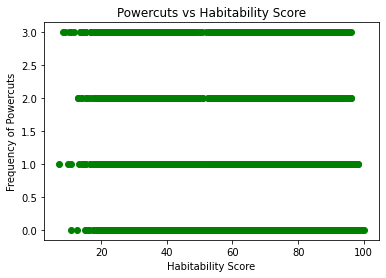

In [18]:
plt.title("Powercuts vs Habitability Score")
plt.xlabel("Habitability Score")
plt.ylabel("Frequency of Powercuts")
plt.scatter(df_train.Habitability_score,df_train.Frequency_of_Powercuts,c='g')
plt.show()

Poeple doesn't care much about the frequency of powercuts while buying a property

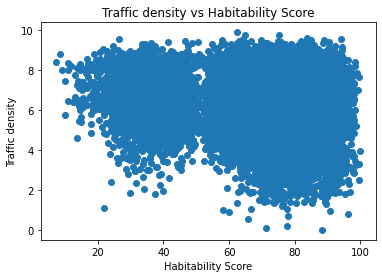

In [19]:
plt.title("Traffic density vs Habitability Score")
plt.ylabel("Traffic density")
plt.xlabel("Habitability Score")
plt.scatter(df_train.Habitability_score,df_train.Traffic_Density_Score)
plt.show()

KeyboardInterrupt: ignored

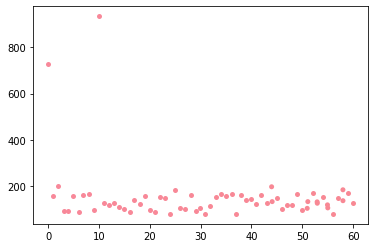

In [20]:

ax = sns.stripplot(y=df_train["Air_Quality_Index"], x=df_train["Habitability_score"], data=df_train)
ax.title("Air quality index vs Habitability Score")
ax.set(xlabel ='Air quality Index', ylabel =' Habitability Score')

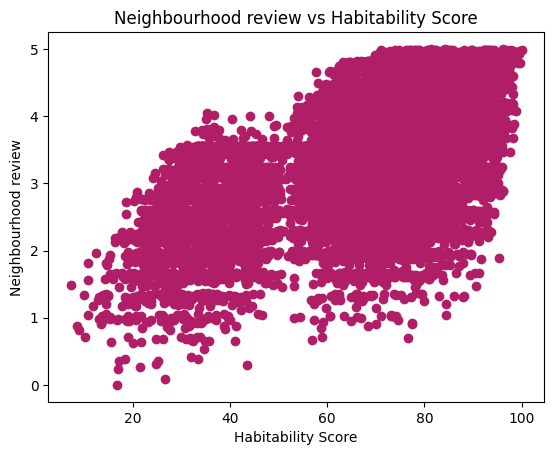

In [15]:
plt.title("Neighbourhood review vs Habitability Score")
plt.ylabel("Neighbourhood review")
plt.xlabel("Habitability Score")
plt.scatter(df_train.Habitability_score, df_train.Neighborhood_Review,c='#B01E68')
plt.show()

In [ ]:
plt.title("Dust and Noise vs Habitability Score")
plt.ylabel("Dust and Noise")
plt.xlabel("Habitability Score")
plt.scatter(df_train.Habitability_score,df_train.Dust_and_Noise,c='#3A3845')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()

In [18]:
df_train['Property_Type']= le1.fit_transform(df_train['Property_Type'])
df_train['Furnishing']= le2.fit_transform(df_train['Furnishing'])
df_train['Power_Backup']= le3.fit_transform(df_train['Power_Backup'])
df_train['Water_Supply']= le4.fit_transform(df_train['Water_Supply'])
df_train['Crime_Rate']= le5.fit_transform(df_train['Crime_Rate'])
df_train['Dust_and_Noise']= le6.fit_transform(df_train['Dust_and_Noise'])
# print(df_train.Property_Type)
# print(df_train.Dust_and_Noise)
df_test['Property_Type']= le1.transform(df_test['Property_Type'])
df_test['Furnishing']= le2.transform(df_test['Furnishing'])
df_test['Power_Backup']= le3.transform(df_test['Power_Backup'])
df_test['Water_Supply']= le4.transform(df_test['Water_Supply'])
df_test['Crime_Rate']= le5.transform(df_test['Crime_Rate'])
df_test['Dust_and_Noise']= le6.transform(df_test['Dust_and_Noise'])

In [19]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [20]:
df_train.drop(['Property_ID'],axis=1,inplace=True)
df_test.drop(['Property_ID'],axis=1,inplace=True)

In [21]:
x = df_train.iloc[:,:-1] 
y = df_train.iloc[:,-1] 
# print(df_train.iloc[:,-1] )   

In [22]:
xtrain,xtest,ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = 42)
print("test")
print(ytest)
print(xtest)
print("train")
print(xtrain)
print(ytrain)

test
3548     71.60
11863    77.52
35281    89.74
28389    77.95
39177    81.42
         ...  
7555     70.49
29023    88.67
2255     64.00
34720    90.94
8986     84.71
Name: Habitability_score, Length: 3950, dtype: float64
       Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
3548               1            661                4.0                3   
11863              1            514                4.0                1   
35281              4           1260                7.0                1   
28389              5           1216                2.0                4   
39177              1            805                3.0                1   
...              ...            ...                ...              ...   
7555               5           1338                3.0                2   
29023              1            453                4.0                1   
2255               4           1205                7.0                2   
34720              4     

In [23]:
xtrain.shape, xtest.shape, ytrain.shape,ytest.shape
print(ytrain.shape,ytest.shape)

(35549,) (3950,)


In [24]:
k = 42
models = [LinearRegression(),DecisionTreeRegressor(random_state = k),
          RandomForestRegressor(random_state = k),Lasso(random_state = k),Ridge(random_state = k),
         SVR(),AdaBoostRegressor(random_state = k),GradientBoostingRegressor(random_state = k),
          XGBRegressor(random_state = k),
         SGDRegressor(random_state = k),CatBoostRegressor(random_state = k),ElasticNet(random_state = k),
         BayesianRidge()]
for i in models:
    print(20*'=',i,20*'=')
    model = i
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print('MSE        : ',mean_squared_error(ytest,ypred))
    print('MAE        : ',mean_absolute_error(ytest,ypred))
    print('RMSE       : ',np.sqrt(mean_squared_error(ytest,ypred)))
    print('MAPE       : ',mean_absolute_percentage_error(ytest,ypred))
    print('R^2 Score  : ', r2_score(ytest,ypred) )
    print(70*'*')

==================== LinearRegression() ====================
MSE        :  90.03612524983691
MAE        :  7.470636797369446
RMSE       :  9.48873675732639
MAPE       :  0.12695077784403225
R^2 Score  :  0.5714478033086737
**********************************************************************
==================== DecisionTreeRegressor(random_state=42) ====================
MSE        :  68.54463483544302
MAE        :  6.018248101265823
RMSE       :  8.279168728528427
MAPE       :  0.09283982544087223
R^2 Score  :  0.6737425811181593
**********************************************************************
==================== RandomForestRegressor(random_state=42) ====================
MSE        :  37.913101174837976
MAE        :  4.571764987341773
RMSE       :  6.157361543294171
MAPE       :  0.07148008852247802
R^2 Score  :  0.8195419588884768
**********************************************************************
==================== Lasso(random_state=42) ====================
MSE       

In [25]:
k = 42
models = RandomForestRegressor(random_state = k)

models.fit(xtrain,ytrain)
ypred = models.predict(xtest)
print('MSE        : ',mean_squared_error(ytest,ypred))
print('MAE        : ',mean_absolute_error(ytest,ypred))
print('RMSE       : ',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE       : ',mean_absolute_percentage_error(ytest,ypred))
print('R^2 Score  : ', r2_score(ytest,ypred))

MSE        :  37.913101174837976
MAE        :  4.571764987341773
RMSE       :  6.157361543294171
MAPE       :  0.07148008852247802
R^2 Score  :  0.8195419588884768


In [26]:
k = 42
lmodels = CatBoostRegressor(random_state = k)

lmodels.fit(xtrain,ytrain)
ypred = lmodels.predict(xtest)
print('MSE        : ',mean_squared_error(ytest,ypred))
print('MAE        : ',mean_absolute_error(ytest,ypred))
print('RMSE       : ',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE       : ',mean_absolute_percentage_error(ytest,ypred))
print('R^2 Score  : ', r2_score(ytest,ypred) )

Learning rate set to 0.07198
0:	learn: 13.4062488	total: 9.43ms	remaining: 9.42s
1:	learn: 12.8117225	total: 18.3ms	remaining: 9.15s
2:	learn: 12.2641950	total: 26.8ms	remaining: 8.91s
3:	learn: 11.7516671	total: 38.7ms	remaining: 9.65s
4:	learn: 11.3053231	total: 48.6ms	remaining: 9.68s
5:	learn: 10.9032983	total: 57.6ms	remaining: 9.54s
6:	learn: 10.5270359	total: 67.7ms	remaining: 9.61s
7:	learn: 10.1828717	total: 76.1ms	remaining: 9.44s
8:	learn: 9.8864734	total: 84.9ms	remaining: 9.34s
9:	learn: 9.6018828	total: 93.9ms	remaining: 9.3s
10:	learn: 9.3461903	total: 103ms	remaining: 9.27s
11:	learn: 9.0923602	total: 111ms	remaining: 9.12s
12:	learn: 8.8899994	total: 119ms	remaining: 9.05s
13:	learn: 8.6936504	total: 127ms	remaining: 8.98s
14:	learn: 8.5142377	total: 136ms	remaining: 8.94s
15:	learn: 8.3659387	total: 151ms	remaining: 9.27s
16:	learn: 8.2274634	total: 160ms	remaining: 9.27s
17:	learn: 8.1022795	total: 170ms	remaining: 9.26s
18:	learn: 7.9930102	total: 178ms	remaining: 9

In [27]:
ch_df = pd.DataFrame({
    "Property_Type":['Apartment'],
    "Property_Area":[733],
    "Number_of_Windows":[2],
    "Number_of_Doors":[2],
    "Furnishing":["Unfurnished"],
    "Frequency_of_Powercuts":[1],
    "Power_Backup":["No"],
    "Water_Supply":["Once in a day - Evening"],
    "Traffic_Density_Score":[4.37],
    "Crime_Rate":["Well below average"],
    "Dust_and_Noise":["Medium"],
    "Air_Quality_Index":[96],
    "Neighborhood_Review":[3.55]
})
ch_df['Property_Type'] = le1.transform(ch_df['Property_Type'])
ch_df['Furnishing'] = le2.transform(ch_df['Furnishing'])
ch_df['Power_Backup'] = le3.transform(ch_df['Power_Backup'])
ch_df['Water_Supply'] = le4.transform(ch_df['Water_Supply'])
ch_df['Crime_Rate'] = le5.transform(ch_df['Crime_Rate'])
ch_df['Dust_and_Noise'] = le6.transform(ch_df['Dust_and_Noise'])

In [28]:
ch_df

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,1,733,2,2,2,1,1,2,4.37,3,2,96,3.55


## RandomForestRegressor & CatBoostRegressor are the Best Models

In [29]:
lmodels.predict(ch_df)

array([60.54257506])

In [30]:
models.predict(ch_df)

array([65.4834])

In [31]:
import pickle
pickle.dump(le1,open('le1.pkl','wb'))
pickle.dump(le2,open('le2.pkl','wb'))
pickle.dump(le3,open('le3.pkl','wb'))
pickle.dump(le4,open('le4.pkl','wb'))
pickle.dump(le5,open('le5.pkl','wb'))
pickle.dump(le6,open('le6.pkl','wb'))

#models dumping
pickle.dump(lmodels,open('cbr.pkl','wb'))
pickle.dump(models,open('rfr.pkl','wb'))